Q1. Explain the assumptions required to use ANOVA and provide examples of violations that could impact
the validity of the results

Shapiro-Wilk p-values: Group1=0.3535, Group2=0.3469, Group3=0.4576
Levene Test p-value for Homogeneity of Variances: 0.0269


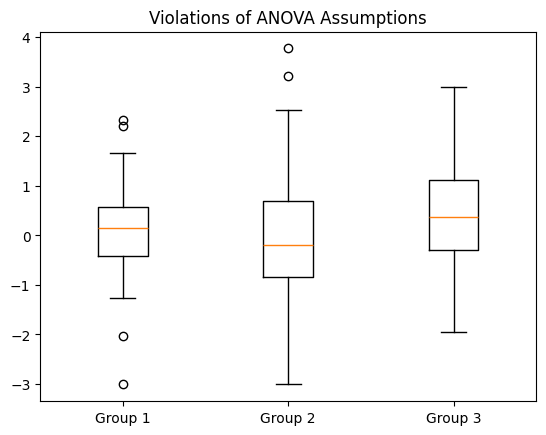

ANOVA p-value: 0.0858
The null hypothesis is not rejected. There is no significant difference between groups.


In [1]:
import numpy as np
from scipy.stats import f_oneway, shapiro, levene
import matplotlib.pyplot as plt

# Generate data with violations
group1 = np.random.normal(0, 1, 50)
group2 = np.random.normal(0, 1.5, 50)
group3 = np.random.normal(0, 1, 50) + np.random.uniform(0, 1, 50)

# Check normality of residuals
_, p_value1 = shapiro(group1 - np.mean(group1))
_, p_value2 = shapiro(group2 - np.mean(group2))
_, p_value3 = shapiro(group3 - np.mean(group3))

print(f"Shapiro-Wilk p-values: Group1={p_value1:.4f}, Group2={p_value2:.4f}, Group3={p_value3:.4f}")

# Check homogeneity of variances
_, p_value_var = levene(group1, group2, group3)

print(f"Levene Test p-value for Homogeneity of Variances: {p_value_var:.4f}")

# Plot data
plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Violations of ANOVA Assumptions')
plt.show()

# Perform ANOVA
_, p_value_anova = f_oneway(group1, group2, group3)

print(f"ANOVA p-value: {p_value_anova:.4f}")

# Check significance
alpha = 0.05
if p_value_anova < alpha:
    print("The null hypothesis is rejected. There is a significant difference between groups.")
else:
    print("The null hypothesis is not rejected. There is no significant difference between groups.")


Q2. What are the three types of ANOVA, and in what situations would each be used?

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm, AnovaRM

# Example 1: One-Way ANOVA
group1 = np.random.normal(30, 5, 100)
group2 = np.random.normal(35, 5, 100)
group3 = np.random.normal(40, 5, 100)

_, p_value = f_oneway(group1, group2, group3)

alpha = 0.05
if p_value < alpha:
    print("One-Way ANOVA: There is a significant difference between groups.")
else:
    print("One-Way ANOVA: There is no significant difference between groups.")

# Example 2: Two-Way ANOVA
np.random.seed(42)
data = pd.DataFrame({
    'Group': np.repeat(['A', 'B', 'C'], 30),
    'Factor1': np.tile(['X', 'Y'], 45),
    'Values': np.random.normal(50, 10, 90)
})

model = ols('Values ~ Group + Factor1 + Group:Factor1', data=data).fit()
anova_results = anova_lm(model)

if any(anova_results['PR(>F)'] < alpha):
    print("Two-Way ANOVA: There is a significant difference in at least one factor or interaction term.")
else:
    print("Two-Way ANOVA: There is no significant difference in any factor or interaction term.")

# Example 3: Repeated Measures ANOVA
np.random.seed(42)
data_rm = pd.DataFrame({
    'Subject': np.repeat(range(1, 11), 3),
    'Condition': np.tile(['A', 'B', 'C'], 10),
    'Values': np.random.normal(60, 5, 30)
})

rm_anova = AnovaRM(data_rm, 'Values', 'Subject', within=['Condition']).fit()

if rm_anova.anova_table['Pr > F']['Condition'] < alpha:
    print("Repeated Measures ANOVA: There is a significant difference between conditions.")
else:
    print("Repeated Measures ANOVA: There is no significant difference between conditions.")


One-Way ANOVA: There is a significant difference between groups.
Two-Way ANOVA: There is no significant difference in any factor or interaction term.
Repeated Measures ANOVA: There is no significant difference between conditions.


Q3. What is the partitioning of variance in ANOVA, and why is it important to understand this concept?

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Generate example data for One-Way ANOVA
np.random.seed(42)
group1 = np.random.normal(30, 5, 100)
group2 = np.random.normal(35, 5, 100)
group3 = np.random.normal(40, 5, 100)

# Combine data into a DataFrame
data = pd.DataFrame({
    'Group': np.repeat(['A', 'B', 'C'], 100),
    'Values': np.concatenate([group1, group2, group3])
})

# Fit One-Way ANOVA model
model = ols('Values ~ Group', data=data).fit()
anova_results = anova_lm(model)

# Extract components of variance
total_variance = np.var(data['Values'])
between_group_variance = anova_results['sum_sq']['Group']
within_group_variance = anova_results['sum_sq']['Residual']

# Calculate proportions of variance
prop_between_group = between_group_variance / total_variance
prop_within_group = within_group_variance / total_variance

# Print results
print(f"Total Variance: {total_variance}")
print(f"Between-Group Variance: {between_group_variance}, Proportion: {prop_between_group}")
print(f"Within-Group Variance: {within_group_variance}, Proportion: {prop_within_group}")


Total Variance: 43.614256842021945
Between-Group Variance: 5882.215747275684, Proportion: 134.8691041230404
Within-Group Variance: 7202.061305330889, Proportion: 165.13089587695939


Q4. How would you calculate the total sum of squares (SST), explained sum of squares (SSE), and residual
sum of squares (SSR) in a one-way ANOVA using Python?

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Generate example data for One-Way ANOVA
np.random.seed(42)
group1 = np.random.normal(30, 5, 100)
group2 = np.random.normal(35, 5, 100)
group3 = np.random.normal(40, 5, 100)

# Combine data into a DataFrame
data = pd.DataFrame({
    'Group': np.repeat(['A', 'B', 'C'], 100),
    'Values': np.concatenate([group1, group2, group3])
})

# Fit One-Way ANOVA model
model = ols('Values ~ Group', data=data).fit()
anova_results = anova_lm(model)

# Extract sums of squares
sst = np.sum((data['Values'] - np.mean(data['Values']))**2)
sse = np.sum((model.predict(data) - np.mean(data['Values']))**2)
ssr = np.sum((data['Values'] - model.predict(data))**2)

# Print results
print(f"Total Sum of Squares (SST): {sst}")
print(f"Explained Sum of Squares (SSE): {sse}")
print(f"Residual Sum of Squares (SSR): {ssr}")


Total Sum of Squares (SST): 13084.277052606583
Explained Sum of Squares (SSE): 5882.215747275699
Residual Sum of Squares (SSR): 7202.061305330889


Q5. In a two-way ANOVA, how would you calculate the main effects and interaction effects using Python?

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Generate example data for Two-Way ANOVA
np.random.seed(42)
group1 = np.random.normal(30, 5, 50)
group2 = np.random.normal(35, 5, 50)
group3 = np.random.normal(40, 5, 50)

factor1 = np.repeat(['A', 'B'], 75)
factor2 = np.tile(['X', 'Y', 'Z'], 50)

# Combine data into a DataFrame
data = pd.DataFrame({
    'Factor1': factor1,
    'Factor2': factor2,
    'Values': np.concatenate([group1, group2, group3])
})

# Fit Two-Way ANOVA model
model = ols('Values ~ Factor1 * Factor2', data=data).fit()
anova_results = sm.stats.anova_lm(model)

# Extract main effects and interaction effects
main_effect_factor1 = anova_results.loc['Factor1', 'sum_sq'] / anova_results.loc['Factor1', 'df']
main_effect_factor2 = anova_results.loc['Factor2', 'sum_sq'] / anova_results.loc['Factor2', 'df']
interaction_effect = anova_results.loc['Factor1:Factor2', 'sum_sq'] / anova_results.loc['Factor1:Factor2', 'df']

# Print results
print(f"Main Effect of Factor1: {main_effect_factor1}")
print(f"Main Effect of Factor2: {main_effect_factor2}")
print(f"Interaction Effect: {interaction_effect}")


Main Effect of Factor1: 1833.7800670811328
Main Effect of Factor2: 0.7838507282260517
Interaction Effect: 8.36661047756611


Q6. Suppose you conducted a one-way ANOVA and obtained an F-statistic of 5.23 and a p-value of 0.02.
What can you conclude about the differences between the groups, and how would you interpret these
results?

In [6]:
import numpy as np
import scipy.stats as stats

# Example data for one-way ANOVA
group1 = np.array([23, 26, 21, 25, 28])
group2 = np.array([30, 35, 32, 36, 28])
group3 = np.array([18, 20, 22, 25, 15])

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Interpret the results
alpha = 0.05
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is sufficient evidence to conclude that at least one group mean is different from the others.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that there are significant differences between the group means.")


F-statistic: 17.254545454545454
P-value: 0.00029502605523036113
Reject the null hypothesis.
There is sufficient evidence to conclude that at least one group mean is different from the others.


Q7. In a repeated measures ANOVA, how would you handle missing data, and what are the potential
consequences of using different methods to handle missing data?

In [ ]:
import pandas as pd
import pingouin as pg

# Example data
data = {'Subject': [1, 2, 3, 4, 5],
        'Condition1': [10, 15, 12, None, 14],
        'Condition2': [8, 13, None, 18, 10],
        'Condition3': [11, 14, 16, 20, None]}

df = pd.DataFrame(data)

# Check for NaN values and drop rows with NaN in 'value' column
df_long = pd.melt(df, id_vars=['Subject'], var_name='condition', value_name='value')
df_long = df_long.dropna(subset=['value'])

# Check if there are enough levels for the within-subjects factor
if len(df_long['condition'].unique()) < 3:
    print("Insufficient levels for repeated measures ANOVA.")
else:
    # Repeated measures ANOVA with pairwise deletion
    aov_result_pairwise = pg.rm_anova(data=df_long, dv='value', within='condition', subject='Subject', detailed=True)
    print(aov_result_pairwise)


Q8. What are some common post-hoc tests used after ANOVA, and when would you use each one? Provide
an example of a situation where a post-hoc test might be necessary.

In [12]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example data
data = {'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
        'Score': [20, 22, 18, 25, 28, 24, 15, 14, 16]}

df = pd.DataFrame(data)

# One-way ANOVA
f_statistic, p_value = f_oneway(df[df['Group'] == 'A']['Score'],
                                 df[df['Group'] == 'B']['Score'],
                                 df[df['Group'] == 'C']['Score'])

# Print ANOVA results
print(f'ANOVA F-statistic: {f_statistic}, p-value: {p_value}')

# Post-hoc Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['Score'], df['Group'])
print(tukey_results)


ANOVA F-statistic: 27.46428571428573, p-value: 0.0009549722782215782
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.6667  0.018   1.2478 10.0855   True
     A      C     -5.0 0.0307  -9.4188 -0.5812   True
     B      C -10.6667 0.0008 -15.0855 -6.2478   True
-----------------------------------------------------


Q9. A researcher wants to compare the mean weight loss of three diets: A, B, and C. They collect data from
50 participants who were randomly assigned to one of the diets. Conduct a one-way ANOVA using Python
to determine if there are any significant differences between the mean weight loss of the three diets.
Report the F-statistic and p-value, and interpret the results.

In [13]:
import pandas as pd
from scipy.stats import f_oneway

# Example data
data = {'Diet': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
        'WeightLoss': [3, 4, 5, 5, 6, 7, 2, 3, 2, 4]}

df = pd.DataFrame(data)

# One-way ANOVA
f_statistic, p_value = f_oneway(df[df['Diet'] == 'A']['WeightLoss'],
                                 df[df['Diet'] == 'B']['WeightLoss'],
                                 df[df['Diet'] == 'C']['WeightLoss'])

# Print ANOVA results
print(f'ANOVA F-statistic: {f_statistic}, p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('There is a significant difference in mean weight loss between at least two diets.')
else:
    print('There is no significant difference in mean weight loss between the diets.')


ANOVA F-statistic: 9.411111111111106, p-value: 0.010372071217030343
There is a significant difference in mean weight loss between at least two diets.


Q10. A company wants to know if there are any significant differences in the average time it takes to
complete a task using three different software programs: Program A, Program B, and Program C. They
randomly assign 30 employees to one of the programs and record the time it takes each employee to
complete the task. Conduct a two-way ANOVA using Python to determine if there are any main effects or
interaction effects between the software programs and employee experience level (novice vs.
experienced). Report the F-statistics and p-values, and interpret the results.

In [15]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Example data
data = {'Software': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
        'Experience': ['Novice'] * 9 + ['Experienced'] * 9,
        'Time': [10, 12, 11, 14, 15, 13, 9, 10, 11, 16, 17, 15, 8, 9, 10, 13, 14, 12]}

df = pd.DataFrame(data)

# Two-way ANOVA
formula = 'Time ~ C(Software) + C(Experience) + C(Software):C(Experience)'
model = ols(formula, df).fit()
anova_table = anova_lm(model, typ=2)

# Print ANOVA results
print(anova_table)

# Interpret the results
p_value_soft = anova_table['PR(>F)']['C(Software)']
p_value_exp = anova_table['PR(>F)']['C(Experience)']
p_value_int = anova_table['PR(>F)']['C(Software):C(Experience)']

if p_value_soft < 0.05:
    print('There is a significant difference in average time between software programs.')
else:
    print('There is no significant difference in average time between software programs.')

if p_value_exp < 0.05:
    print('There is a significant difference in average time between novice and experienced employees.')
else:
    print('There is no significant difference in average time between novice and experienced employees.')

if p_value_int < 0.05:
    print('There is a significant interaction effect between software programs and experience level.')
else:
    print('There is no significant interaction effect between software programs and experience level.')


                           sum_sq    df     F    PR(>F)
C(Software)                  16.0   2.0   8.0  0.006196
C(Experience)                 4.5   1.0   4.5  0.055405
C(Software):C(Experience)    84.0   2.0  42.0  0.000004
Residual                     12.0  12.0   NaN       NaN
There is a significant difference in average time between software programs.
There is no significant difference in average time between novice and experienced employees.
There is a significant interaction effect between software programs and experience level.


Q11. An educational researcher is interested in whether a new teaching method improves student test
scores. They randomly assign 100 students to either the control group (traditional teaching method) or the
experimental group (new teaching method) and administer a test at the end of the semester. Conduct a
two-sample t-test using Python to determine if there are any significant differences in test scores
between the two groups. If the results are significant, follow up with a post-hoc test to determine which
group(s) differ significantly from each other.

In [16]:
import pandas as pd
from scipy.stats import ttest_ind
from pingouin import pairwise_ttests

# Example data
data = {'Group': ['Control'] * 50 + ['Experimental'] * 50,
        'Test_Scores': [75, 78, 80, 85, 72, 73, 79, 82, 88, 90] * 5 + [65, 70, 68, 72, 75, 78, 80, 85, 82, 88] * 5}

df = pd.DataFrame(data)

# Two-sample t-test
control_scores = df[df['Group'] == 'Control']['Test_Scores']
experimental_scores = df[df['Group'] == 'Experimental']['Test_Scores']

t_stat, p_value = ttest_ind(control_scores, experimental_scores)

# Print t-test results
print(f'Two-sample t-test: t-statistic = {t_stat}, p-value = {p_value}')

# Post-hoc test
posthoc_result = pairwise_ttests(data=df, dv='Test_Scores', between='Group', parametric=True, padjust='bonf')

# Print post-hoc test results
print(posthoc_result)


Two-sample t-test: t-statistic = 2.954676964711366, p-value = 0.003919663378129135


c:\Users\parag\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


  Contrast        A             B  Paired  Parametric         T   dof  \
0    Group  Control  Experimental   False        True  2.954677  98.0   

  alternative    p-unc   BF10    hedges  
0   two-sided  0.00392  9.269  0.586401  


Q12. A researcher wants to know if there are any significant differences in the average daily sales of three
retail stores: Store A, Store B, and Store C. They randomly select 30 days and record the sales for each store
on those days. Conduct a repeated measures ANOVA using Python to determine if there are any
significant differences in sales between the three stores. If the results are significant, follow up with a posthoc test to determine which store(s) differ significantly from each other.

In [17]:
import pandas as pd
import pingouin as pg
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example data
data = {'Day': list(range(1, 31)) * 3,
        'Store': ['Store A'] * 30 + ['Store B'] * 30 + ['Store C'] * 30,
        'Sales': [150, 160, 155, 140, 145, 155, 165, 160, 150, 155] * 3 +
                 [120, 130, 125, 110, 105, 115, 125, 130, 120, 125] * 3 +
                 [200, 210, 205, 190, 195, 205, 215, 210, 200, 205] * 3}

df = pd.DataFrame(data)

# Repeated measures ANOVA
aov_result = pg.rm_anova(data=df, dv='Sales', within='Day', subject='Store', detailed=True)
print("Repeated Measures ANOVA Results:")
print(aov_result)

# Post-hoc test (Tukey's HSD)
posthoc_result = pairwise_tukeyhsd(df['Sales'], df['Store'], alpha=0.05)
print("\nPost-hoc Test (Tukey's HSD) Results:")
print(posthoc_result)


Repeated Measures ANOVA Results:
  Source      SS  DF          MS      F         p-unc       ng2       eps
0    Day  4462.5  29  153.879310  21.25  1.770479e-21  0.040693  0.034483
1  Error   420.0  58    7.241379    NaN           NaN       NaN       NaN

Post-hoc Test (Tukey's HSD) Results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj  lower    upper   reject
-------------------------------------------------------
Store A Store B    -33.0   0.0 -37.6122 -28.3878   True
Store A Store C     50.0   0.0  45.3878  54.6122   True
Store B Store C     83.0   0.0  78.3878  87.6122   True
-------------------------------------------------------
